In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [13]:
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [14]:
df["target"]= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = iris.data # features
y = iris.target # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
# DT modeli olustur ve train et
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 42) # criterion="entropy"
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
# DT evaluation test
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("iris veri seti ile egitilen DT modeli dogrulugu: ", accuracy)

iris veri seti ile egitilen DT modeli dogrulugu:  1.0


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

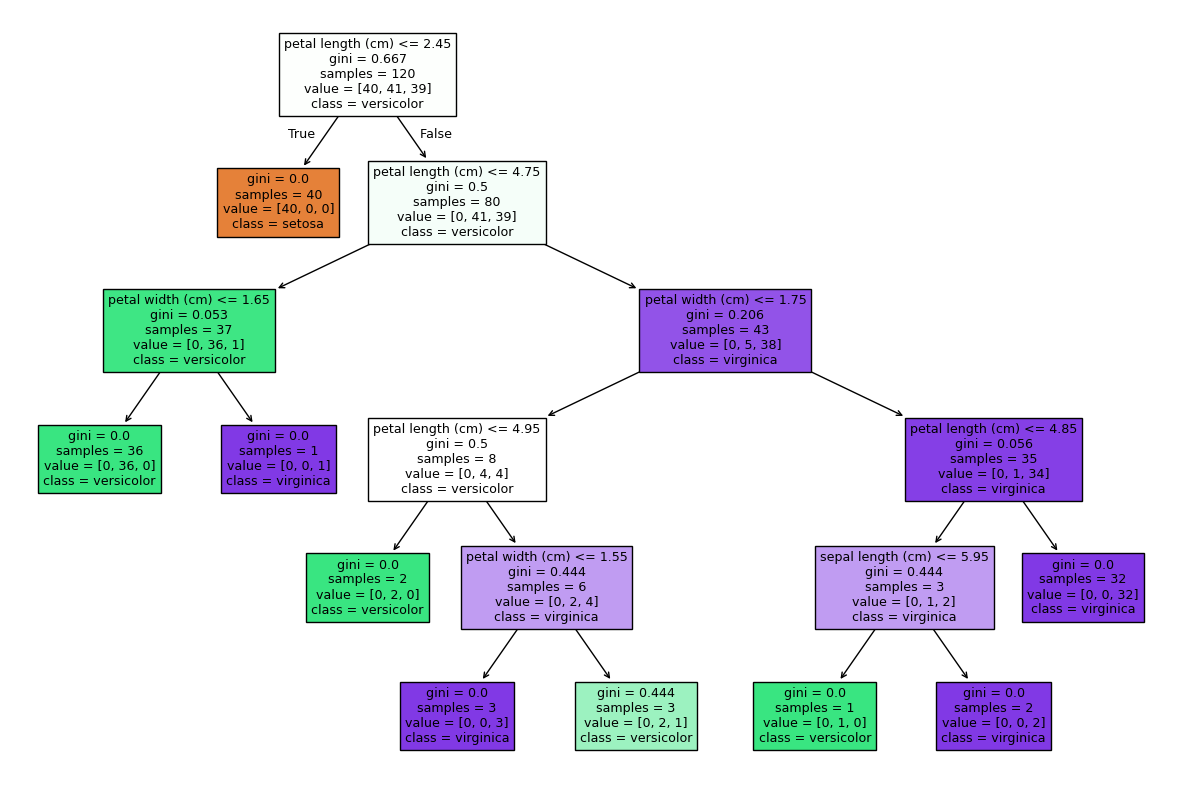

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(tree_clf, filled = True, feature_names = iris. feature_names, class_names = list(iris.target_names))
plt.show()

sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
demek oluyor ki en önemli feature petal lenght miş zaten ağacımızda da görüyoruz en önemli özellik en yukarıda olur

In [21]:
feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names

feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)


for importance, feature_name in feature_importances_sorted:
    print(f"{feature_name}: {importance}")

petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


sınırları görselleştirme

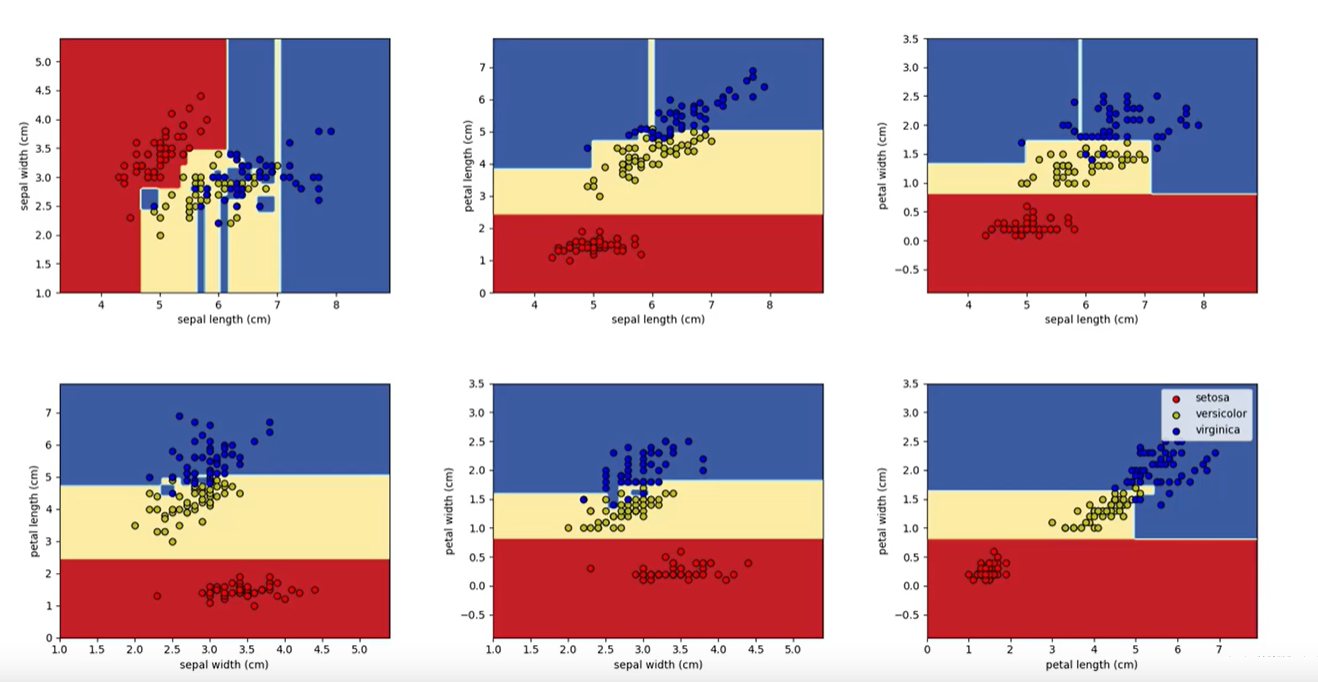

Farklı bir veri setiyle regresyon problemi çözümü

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
diabetes = load_diabetes()

X = diabetes.data # features
y = diabetes.target # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
# karar agaci regresyon modeli
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
print("mse: ",mse)

rmse = np.sqrt(mse)
print("rmse: ",rmse)

mse:  4976.797752808989
rmse:  70.54642267903446


In [29]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [33]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [34]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# create a data set
X = np.sort(5 * np.random.rand(80,1), axis = 0)  #feature
y = np.sin(X).ravel()  #target
y[ :: 5] += 5 * (0.5 - np.random.rand(16))  #noise

# plt.scatter(X, y)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

regr_2 = DecisionTreeRegressor(max_depth=15)
regr_2.fit(X, y)

X_test = np.arange(0, 5,0.05)[:, np.newaxis]
y_pred_1= regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)

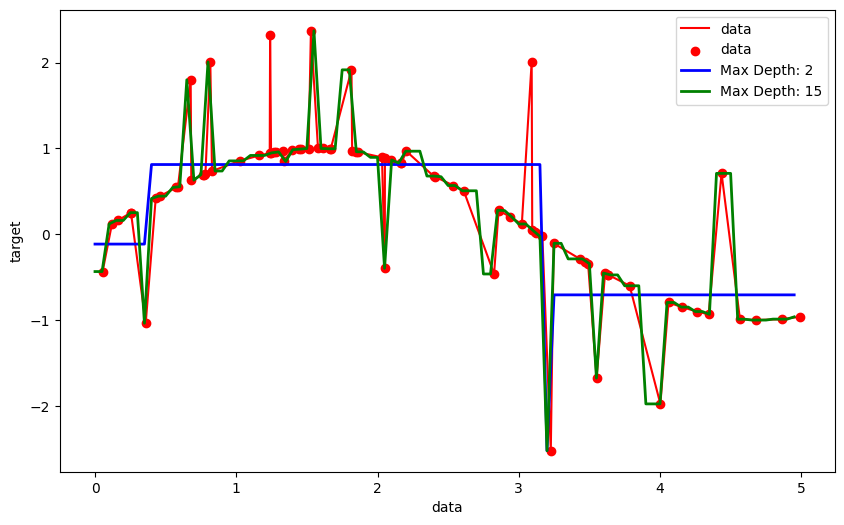

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, c = "red", label = "data")
plt.scatter(X, y, c = "red", label = "data")
plt.plot(X_test, y_pred_1, color = "blue", label = "Max Depth: 2", linewidth = 2)
plt.plot(X_test, y_pred_2, color = "green", label = "Max Depth: 15", linewidth = 2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()